In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("sc1_ss_LF.csv")
data.ts = pd.to_datetime(data.ts, format='%Y-%m-%d %H:%M:%S.%f%z')

<AxesSubplot:>

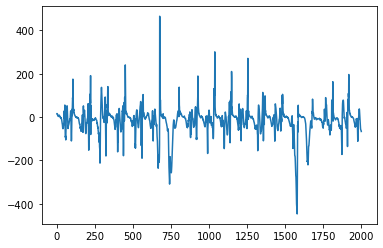

In [3]:
data.gy[0:2000].plot()

In [4]:
def low_pass_filter(sequence, sampling_frequency, cut_frequency, n):
    nyq = 0.5 * sampling_frequency
    cutoff = cut_frequency / nyq
    b, a = signal.butter(n, cutoff)
    return signal.filtfilt(b, a, sequence)

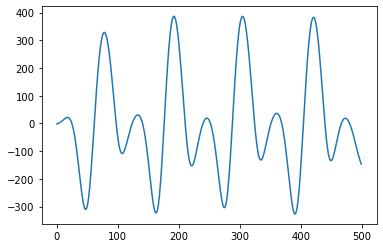

In [5]:
plt.plot(low_pass_filter(data.gx[0:500], 0.2, 0.005, 3))

In [6]:
import plotly.tools

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(raw := data.gx)
ax.plot(filtered:=low_pass_filter(data.gx, 0.2, 0.005, 3), c="black")


local_maximum = signal.find_peaks(filtered)[0]
local_minimum = signal.find_peaks(-filtered)[0]

ax.scatter(x=local_maximum, y=raw[local_maximum], c="red")
ax.scatter(x=local_minimum, y=raw[local_minimum], c="blue")

ax.set_ylim(min(min(raw), min(filtered)) - 50, max(max(raw), max(filtered)) + 50)
plotly.tools.mpl_to_plotly(fig)

In [7]:
data.ts.diff().describe()

count                         7724
mean     0 days 00:00:00.009983120
std      0 days 00:00:00.000197050
min      0 days 00:00:00.009948416
25%      0 days 00:00:00.009979136
50%      0 days 00:00:00.009979136
75%      0 days 00:00:00.009979392
max      0 days 00:00:00.019988992
Name: ts, dtype: object

In [8]:
fs = np.mean(1./np.vectorize(pd.Timedelta.total_seconds)(np.diff(data.ts)))
fs

100.19205908512158